<a href="https://colab.research.google.com/github/krrish9669/machine-learning-new/blob/main/houseing_prices_ch2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn


In [14]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("camnugent/california-housing-prices")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/california-housing-prices


In [15]:
import os
os.listdir(path)

['housing.csv']

In [16]:
housing=pd.read_csv(path+"/housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [17]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [18]:
housing["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [19]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


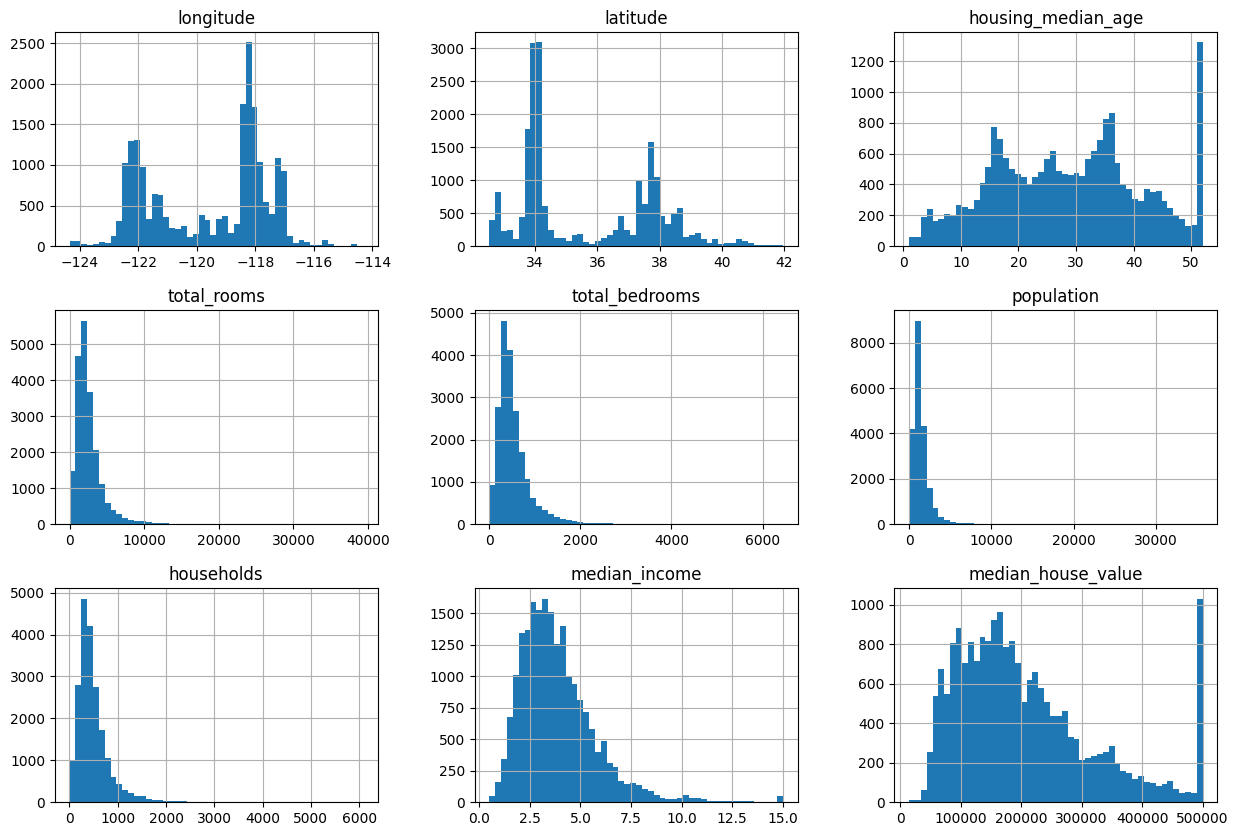

In [20]:
housing.hist(bins=50,figsize=(15,10))
plt.show()


in the above histogram we can see that

> 1.the median attribute doesnt look its in USD.
the data is scaled and capped at 15.0001for higher median incomes.
and 0.4999 for lower median incomes.
2. the housing median age and median house value is also capped this might cause problems later as they are the main attriblues (labels)

a.we can either gain the real data and add them

b. or we can remove those destricts from data sets which are in the capped value.

3. many graphs are tail heavy we need a bell shaped graph for best predictions.

In [21]:
#testset
import hashlib
def test_set_check(identifier,test_ratio,hash):
    return hash(np.int64(identifier)).digest()[-1]<256*test_ratio


In [22]:
#trainingset
def split_train_test_by_id(data,test_ratio,id_column,hash=hashlib.md5):
    ids=data[id_column]
    in_test_set=ids.apply(lambda id_:test_set_check(id_,test_ratio,hash))
    return data.loc[~in_test_set],data.loc[in_test_set]

In [23]:
#housing data doesnt have id col so we will have to give it one
housing_with_id=housing.reset_index()
housing_with_id["id"]=housing["longitude"]*1000+housing["latitude"]
train_set,test_set=split_train_test_by_id(housing_with_id,0.2,"id")

In [24]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)

In [25]:
housing["income_cat"]=np.ceil(housing["median_income"]/1.5)
housing["income_cat"].where(housing["income_cat"]<5,5.0,inplace=True)

/tmp/ipython-input-2425344935.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["income_cat"].where(housing["income_cat"]<5,5.0,inplace=True)


In [26]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing["income_cat"]):
  strat_train_set= housing.loc[train_index]
  strat_test_set=housing.loc[test_index]

In [27]:
housing["income_cat"].value_counts()/len(housing)

,count
income_cat,
3.0,0.350581
2.0,0.318847
4.0,0.176308
5.0,0.114438
1.0,0.039826


In [28]:
for set in (strat_train_set,strat_test_set):
  set.drop("income_cat",axis=1,inplace=True)

In [29]:
#play with the data so make a copy n explore
housing=strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

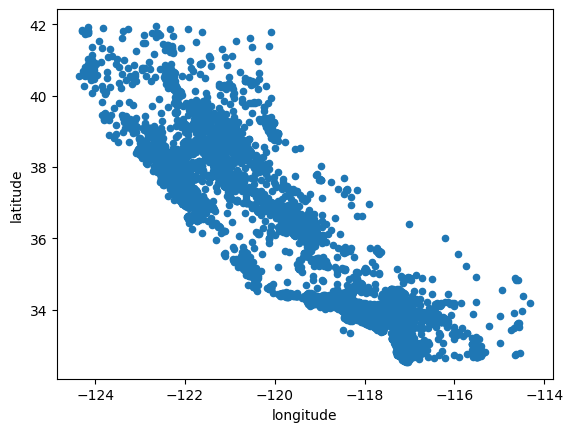

In [30]:
housing.plot(kind="scatter",x="longitude",y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

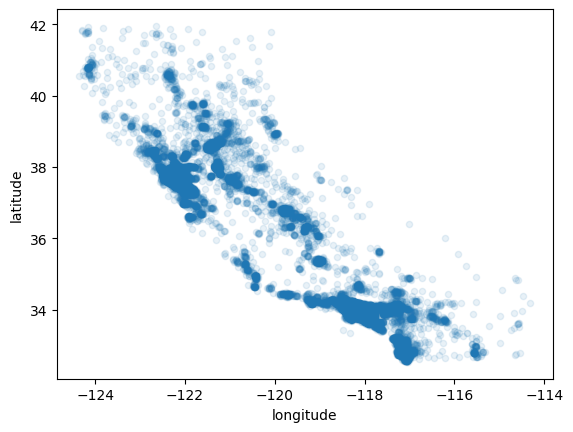

In [31]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)

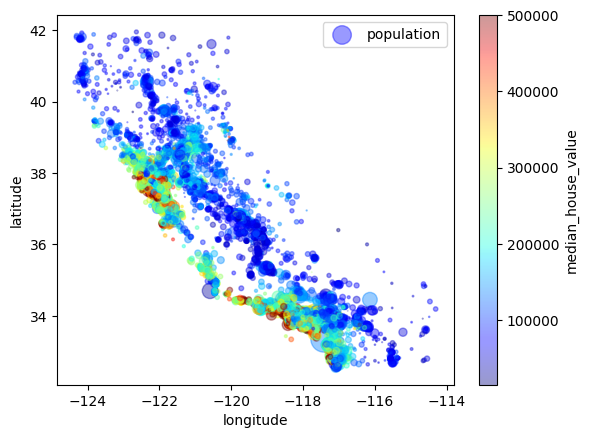

In [32]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,
             s=housing["population"]/100,label="population",c="median_house_value",cmap=plt.get_cmap("jet"),
             colorbar=True)
plt.legend()

In [33]:
corr_matrix = housing.drop("ocean_proximity",axis=1).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.687151
total_rooms,0.135140
housing_median_age,0.114146
households,0.064590
total_bedrooms,0.047781
population,-0.026882
longitude,-0.047466
latitude,-0.142673


array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

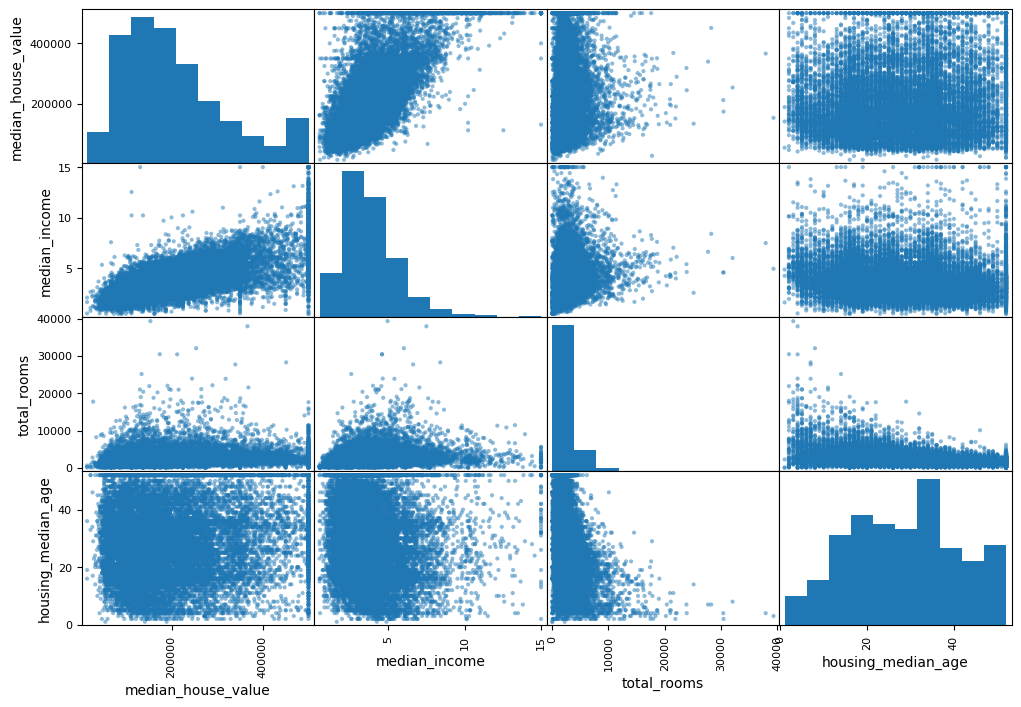

In [34]:
from pandas.plotting import scatter_matrix
attributes=["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes],figsize=(12,8))


<Axes: xlabel='median_income', ylabel='median_house_value'>

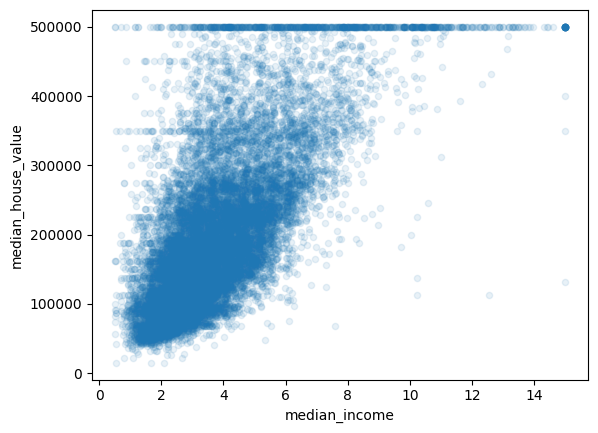

In [35]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)

In [36]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]
corr_matrix = housing.drop("ocean_proximity",axis=1).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.687151
rooms_per_household,0.146255
total_rooms,0.135140
housing_median_age,0.114146
households,0.064590
total_bedrooms,0.047781
population_per_household,-0.021991
population,-0.026882
longitude,-0.047466


<Axes: xlabel='rooms_per_household', ylabel='median_house_value'>

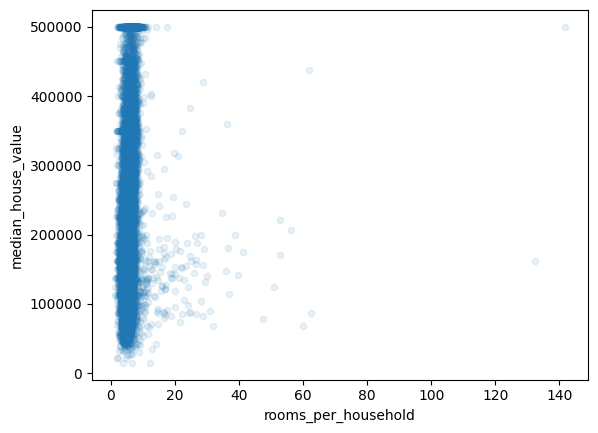

In [37]:
housing.plot(kind="scatter",x="rooms_per_household",y="median_house_value",alpha=0.1)

<Axes: xlabel='population_per_household', ylabel='median_house_value'>

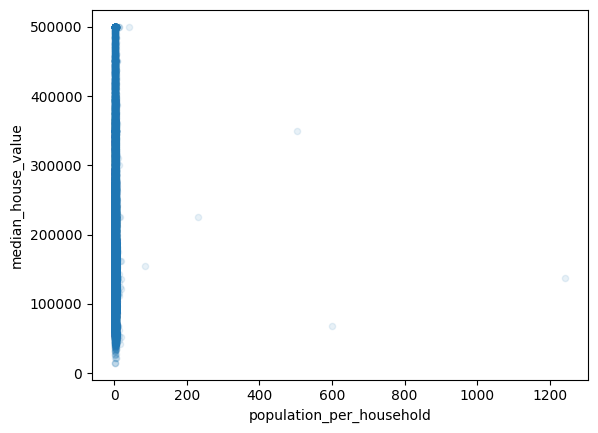

In [38]:
housing.plot(kind="scatter",x="population_per_household",y="median_house_value",alpha=0.1)

<Axes: xlabel='bedrooms_per_room', ylabel='median_house_value'>

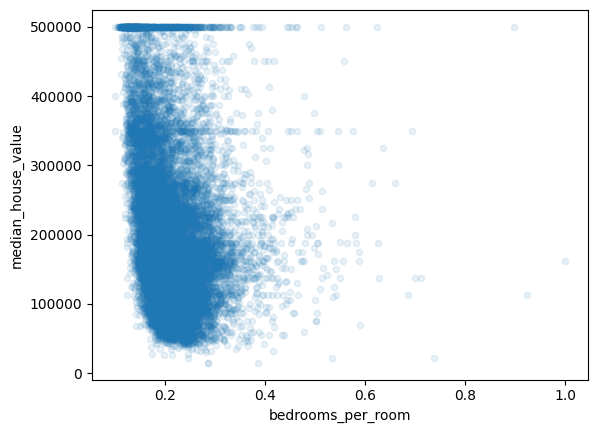

In [39]:
housing.plot(kind="scatter",x="bedrooms_per_room",y="median_house_value",alpha=0.1)


In [40]:
#dataprep
housing=strat_train_set.drop("median_house_value",axis=1)
housing_labels=strat_train_set["median_house_value"].copy()

In [41]:
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(strategy="median")
housing_num=housing.drop("ocean_proximity",axis=1)
imputer.fit(housing_num)


SimpleImputer(strategy='median')

In [42]:
imputer.statistics_


array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [43]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [44]:
X=imputer.transform(housing_num)
housing_tr=pd.DataFrame(X,columns=housing_num.columns)





In [45]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
housing_cat=housing[["ocean_proximity"]]
housing_cat_encoded=encoder.fit_transform(housing_cat)
housing_cat_encoded


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 4, 1, ..., 0, 0, 1])

In [46]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [47]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
housing_cat_1hot=encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [48]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [49]:
from sklearn.preprocessing import LabelBinarizer
encoder=LabelBinarizer()
housing_cat_1hot=encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [50]:
#transformers
from sklearn.base import BaseEstimator,TransformerMixin
rooms_ix,bedrooms_ix,population_ix,household_ix=3,4,5,6
class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
  def __init__(self,add_bedrooms_per_room=True):
    self.add_bedrooms_per_room=add_bedrooms_per_room
  def fit(self,X,y=None):
    return self
  def transform(self,X,y=None):
    rooms_per_household=X[:,rooms_ix]/X[:,household_ix]
    population_per_household = X[:,population_ix]/X[:,household_ix]
    if self.add_bedrooms_per_room:
      bedrooms_per_room=X[:,bedrooms_ix]/X[:,rooms_ix]
      return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
    else:
      return np.c_[X,rooms_per_household,population_per_household]

attr_adder=CombinedAttributesAdder(add_bedrooms_per_room=False)

housing_extra_attribs=attr_adder.transform(housing.values)



In [51]:

from sklearn.base import BaseEstimator,TransformerMixin

class DataFrameSelector(BaseEstimator,TransformerMixin):
  def __init__(self,attribute_names):
    self.attribute_names=attribute_names
  def fit(self,X,y=None):
    return self
  def transform(self,X):
    return X[self.attribute_names].values

In [52]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

# ===== Custom Transformer for Selecting Attributes =====
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

# ===== Example Custom Transformer for Adding Attributes =====
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        rooms_per_household = X[:, 3] / X[:, 6]
        population_per_household = X[:, 5] / X[:, 6]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, 4] / X[:, 3]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

# ===== Your attribute lists =====
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

# ===== Numeric pipeline =====
num_pipeline = Pipeline([
     ('selector', DataFrameSelector(num_attribs)),
     ('imputer', SimpleImputer(strategy="median")),
     ('attribs_adder', CombinedAttributesAdder()),
     ('std_scaler', StandardScaler())
])

# ===== Categorical pipeline =====
cat_pipeline = Pipeline([
     ('selector', DataFrameSelector(cat_attribs)),
     ('one_hot', OneHotEncoder(handle_unknown='ignore'))
])

# ===== Full pipeline =====
full_pipeline = FeatureUnion(transformer_list=[
     ("num_pipeline", num_pipeline),
     ("cat_pipeline", cat_pipeline)
])

# ===== Transform housing =====
housing_prepared = full_pipeline.fit_transform(housing)
print(housing_prepared.shape)


(16512, 16)


In [53]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression()

In [54]:
some_data=housing.iloc[:3]
some_labels=housing_labels.iloc[:3]
some_data_prepared=full_pipeline.transform(some_data)
print("Predictions:\t",lin_reg.predict(some_data_prepared))

Predictions:	 [ 85657.9089552  305492.62192784 152056.4534612 ]


In [55]:
print("Lables:\t",list(some_labels))

Lables:	 [72100.0, 279600.0, 82700.0]


In [56]:
from sklearn.metrics import mean_squared_error
housing_predictions=lin_reg.predict(housing_prepared)
lin_mse=mean_squared_error(housing_labels,housing_predictions)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

np.float64(68627.8739001908)

In [57]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor()

In [58]:
housing_predictions=tree_reg.predict(housing_prepared)
tree_mse=mean_squared_error(housing_labels,housing_predictions)
tree_rmse=np.sqrt(tree_mse)
tree_rmse

np.float64(0.0)

In [59]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(tree_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
tree_rmse_scores=np.sqrt(-scores)
'''
from sklearn.model_selection import cross_validate
labels=cross_validate(tree_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
tree_rmse_scores=np.sqrt(-scores)'''

'\nfrom sklearn.model_selection import cross_validate\nlabels=cross_validate(tree_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)\ntree_rmse_scores=np.sqrt(-scores)'

In [60]:
def display_scores(scores):
     print("Scores:",scores)
     print("Mean:",scores.mean())
     print("Standard deviation:",scores.std())

In [61]:
display_scores(tree_rmse_scores)

Scores: [71853.24838385 71416.03831842 69337.52361126 70879.78967531
 71103.30084429 77536.13820648 71072.6995077  71516.70766262
 69834.18776574 69648.76483934]
Mean: 71419.83988150099
Standard deviation: 2193.3021693754


In [62]:
lin_scores=cross_val_score(lin_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
lin_rmse_scores=np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71762.76427944 64114.991896   67771.16788595 68635.19072295
 66846.14329343 72528.03737039 73997.08054991 68802.33595104
 66443.28850272 70139.80036018]
Mean: 69104.08008120039
Standard deviation: 2880.3282489894414


In [63]:
from sklearn.ensemble import RandomForestRegressor
forest_reg=RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)

housing_predictions=forest_reg.predict(housing_prepared)
forest_mse=mean_squared_error(housing_labels,housing_predictions)
forest_rmse=np.sqrt(forest_mse)
forest_rmse

np.float64(18706.091846029347)

In [64]:
tree_scores=cross_val_score(forest_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
tree_rmse_scores=np.sqrt(-tree_scores)
display_scores(tree_rmse_scores)

Scores: [51170.68089982 49060.29169    46710.28994166 51972.72123978
 47325.94480975 52501.60535224 52385.58705124 49902.99673215
 48291.72052749 53710.22873789]
Mean: 50303.206698202004
Standard deviation: 2276.86353504381


In [65]:
from sklearn.model_selection import GridSearchCV
param_grid=[
    {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]},
]
forest_reg=RandomForestRegressor()
grid_search=GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared,housing_labels)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [66]:
grid_search.best_estimator_
RandomForestRegressor(bootstrap=True,criterion='mse',max_depth=None, max_features=6,max_leaf_nodes=None,
                      min_samples_leaf=1,min_samples_split=2,min_weight_fraction_leaf=0.0,n_estimators=30,
                      n_jobs=1,oob_score=False,random_state=None,verbose=0,warm_start=False)

RandomForestRegressor(criterion='mse', max_features=6, n_estimators=30,
                      n_jobs=1)

In [67]:
cvres=grid_search.cv_results_
for mean_score,params in zip(cvres["mean_test_score"],cvres["params"]):
  print(np.sqrt(-mean_score),params)

63916.95694292382 {'max_features': 2, 'n_estimators': 3}
55052.96669339624 {'max_features': 2, 'n_estimators': 10}
52422.0890455758 {'max_features': 2, 'n_estimators': 30}
60767.00907613335 {'max_features': 4, 'n_estimators': 3}
52603.85813761157 {'max_features': 4, 'n_estimators': 10}
50396.073679897374 {'max_features': 4, 'n_estimators': 30}
59466.59262737773 {'max_features': 6, 'n_estimators': 3}
52266.85549067127 {'max_features': 6, 'n_estimators': 10}
50083.6852995095 {'max_features': 6, 'n_estimators': 30}
58921.27474839083 {'max_features': 8, 'n_estimators': 3}
52385.19283741009 {'max_features': 8, 'n_estimators': 10}
50387.26738646798 {'max_features': 8, 'n_estimators': 30}
62419.68203920143 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54147.161561384324 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60269.54196452326 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52150.55457623897 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10

In [68]:
feature_importances= grid_search.best_estimator_.feature_importances_
feature_importances

array([8.17191899e-02, 7.44235572e-02, 4.23256466e-02, 1.79121149e-02,
       1.67216342e-02, 1.63332110e-02, 1.64947621e-02, 3.37183875e-01,
       5.47647191e-02, 1.06286649e-01, 6.41422126e-02, 1.52306410e-02,
       1.47627504e-01, 1.54113606e-04, 2.55940202e-03, 6.12076708e-03])

In [69]:
extra_attribs=["room_per_hhold","pop_per_hhold","bedrooms_per_room"]
cat_one_hot_attribs=list(encoder.classes_)
attributes=num_attribs+extra_attribs+cat_one_hot_attribs
sorted(zip(feature_importances,attributes),reverse=True)

[(np.float64(0.3371838753294811), 'median_income'),
 (np.float64(0.1476275042084449), np.str_('INLAND')),
 (np.float64(0.10628664907961101), 'pop_per_hhold'),
 (np.float64(0.08171918991677432), 'longitude'),
 (np.float64(0.07442355721441486), 'latitude'),
 (np.float64(0.06414221256837105), 'bedrooms_per_room'),
 (np.float64(0.05476471912999218), 'room_per_hhold'),
 (np.float64(0.04232564655583614), 'housing_median_age'),
 (np.float64(0.01791211493384526), 'total_rooms'),
 (np.float64(0.016721634217644644), 'total_bedrooms'),
 (np.float64(0.01649476211157354), 'households'),
 (np.float64(0.016333211027492668), 'population'),
 (np.float64(0.015230641004203689), np.str_('<1H OCEAN')),
 (np.float64(0.006120767080675737), np.str_('NEAR OCEAN')),
 (np.float64(0.002559402015863078), np.str_('NEAR BAY')),
 (np.float64(0.0001541136057759007), np.str_('ISLAND'))]

In [70]:
final_model= grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value",axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared=full_pipeline.transform(X_test)
final_predictions=final_model.predict(X_test_prepared)
final_mse=mean_squared_error(y_test,final_predictions)
final_rmse=np.sqrt(final_mse)
print(final_rmse)
print(final_predictions)

47799.34979204578
[483854.1        232790.06666667 208880.         ... 360226.7
 263093.33333333 239883.33333333]


In [71]:
# Best model from GridSearchCV
final_model = grid_search.best_estimator_

# Test set split
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

# Apply preprocessing pipeline
X_test_prepared = full_pipeline.transform(X_test)

# Predictions
final_predictions = final_model.predict(X_test_prepared)

# RMSE calculation
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print("Final RMSE:", final_rmse)

# Side-by-side comparison of predictions and actual values
comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': final_predictions
})

# Show first few rows
print(comparison_df.head(10))

Final RMSE: 47799.34979204578
     Actual      Predicted
0  500001.0  483854.100000
1  162500.0  232790.066667
2  204600.0  208880.000000
3  159700.0  170116.666667
4  184000.0  250130.033333
5  151900.0  160266.666667
6  104900.0  128623.333333
7  500001.0  420893.566667
8  367400.0  245153.400000
9  346500.0  275250.033333
